In [2]:
# ============================
# Import Dataset
# ============================
import pandas as pd
file_path = "sample_new_zealand. csv"
df = pd.read_csv(file_path)
df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df.sort_values('Datetime').reset_index(drop=True)
print(df)

            Date    Lat     Lon  Depth  Mag  Strike  Dip  Rake        Time  \
0     1976/01/15 -30.38 -176.82   33.0  6.2     196   26    91  06:06:46.1   
1     1976/01/15 -30.15 -177.24   33.0  6.1     180   10    73  16:12:22.3   
2     1976/05/04 -44.64  167.57   19.0  6.6      57   18   136  13:56:29.9   
3     1976/06/29 -33.82 -177.83   48.0  6.1      24   37    78  18:30:09.1   
4     1976/07/31 -30.32 -177.96   20.0  6.2     196   31    93  00:46:58.0   
...          ...    ...     ...    ...  ...     ...  ...   ...         ...   
1537  2020/11/29 -31.86  179.20  462.5  5.3     115   35  -178  21:45:22.7   
1538  2020/12/10 -32.88 -179.85   96.0  5.9     139   25   175  20:42:08.3   
1539  2020/12/11 -32.91 -179.05   43.5  5.1     206   34   104  15:30:00.1   
1540  2020/12/18 -32.64 -178.84   35.7  5.1     198   32    97  20:49:15.8   
1541  2020/12/24 -32.05 -178.10   10.0  5.1     197   28    77  20:04:11.8   

                    Datetime  
0    1976-01-15 06:06:46.100  
1

In [3]:
# ===============================================
# Gardner and Knopoff Window Method (1974)
# ===============================================

In [4]:
# --- Step 1: Run the declustering algorithm ---
from gk_decluster import window_decluster, get_valid_clusters, get_mainshocks
clustered_catalog = window_decluster(df)
print(clustered_catalog)  # This catalogue contains mainshocks, dependent shocks and noise

            Date    Lat     Lon  Depth  Mag  Strike  Dip  Rake        Time  \
0     1976/01/15 -30.38 -176.82   33.0  6.2     196   26    91  06:06:46.1   
1     1976/01/15 -30.15 -177.24   33.0  6.1     180   10    73  16:12:22.3   
2     1976/05/04 -44.64  167.57   19.0  6.6      57   18   136  13:56:29.9   
3     1976/06/29 -33.82 -177.83   48.0  6.1      24   37    78  18:30:09.1   
4     1976/07/31 -30.32 -177.96   20.0  6.2     196   31    93  00:46:58.0   
...          ...    ...     ...    ...  ...     ...  ...   ...         ...   
1537  2020/11/29 -31.86  179.20  462.5  5.3     115   35  -178  21:45:22.7   
1538  2020/12/10 -32.88 -179.85   96.0  5.9     139   25   175  20:42:08.3   
1539  2020/12/11 -32.91 -179.05   43.5  5.1     206   34   104  15:30:00.1   
1540  2020/12/18 -32.64 -178.84   35.7  5.1     198   32    97  20:49:15.8   
1541  2020/12/24 -32.05 -178.10   10.0  5.1     197   28    77  20:04:11.8   

                    Datetime             x             y  is_de

In [5]:
# --- Step 2: Identify valid clusters (size >= 2) ---
valid_cluster_ids = get_valid_clusters(clustered_catalog)
print(f"--- Identified Valid Cluster IDs (size >= 2) ---\n{valid_cluster_ids.to_list()}\n")

# Filter the catalog to only include events from these valid clusters
sequences_df = clustered_catalog[clustered_catalog['ClusterID'].isin(valid_cluster_ids)]
print("--- DataFrame with Only Valid Sequences ---")
print(sequences_df[['Datetime', 'Mag', 'ClusterID']])

--- Identified Valid Cluster IDs (size >= 2) ---
[0, 3, 11, 13, 32, 33, 34, 43, 44, 46, 49, 51, 53, 58, 63, 64, 68, 70, 76, 77, 78, 82, 83, 85, 86, 91, 92, 95, 96, 97, 102, 103, 106, 109, 114, 116, 118, 124, 127, 128, 129, 132, 134, 136, 139, 140, 141, 142, 151, 152, 153, 160, 164, 166, 180, 181, 184, 186, 192, 201, 202, 203, 206, 208, 209, 212, 215, 217, 220, 223, 229, 233, 235, 237, 238, 240, 243, 244, 250, 253, 257, 267, 268, 271, 274, 277, 281, 284, 285, 286, 287, 300, 302, 304, 308, 309, 310, 312, 313, 314, 315, 318, 319, 320, 323, 324, 325, 326, 327, 328, 329, 336, 337, 339, 341, 345, 351, 355, 356, 360, 363, 369, 373, 375, 377, 378, 383, 384, 385, 387, 389, 392, 393, 397, 400, 401, 403, 404, 413, 418, 419, 420, 421, 424, 425, 430, 433, 438, 440, 443, 450, 451, 454, 455, 457, 458, 459, 461, 463, 464, 467, 468, 470, 472, 477, 478, 479, 481, 486, 487, 488, 491, 495, 497, 498, 502, 503, 504, 505, 508, 512, 513, 514, 516, 519, 522, 525, 526, 528, 531, 532, 533, 534, 538, 541, 543, 54

In [6]:
# --- Step 3: Identify the mainshock in each sequence ---
final_catalog = get_mainshocks(sequences_df)
print("--- Final Catalog with Mainshocks Identified ---")
print(final_catalog[['Datetime', 'Mag', 'ClusterID', 'Type']])

--- Final Catalog with Mainshocks Identified ---
                    Datetime  Mag  ClusterID       Type
0    1976-01-15 06:06:46.100  6.2          0  Mainshock
1    1976-01-15 16:12:22.300  6.1          0  Dependent
4    1976-07-31 00:46:58.000  6.2          3  Dependent
5    1976-09-30 23:34:14.400  6.5          3  Mainshock
12   1977-10-16 13:14:05.000  5.7          0  Dependent
...                      ...  ...        ...        ...
1533 2020-09-29 00:17:37.300  5.0        703  Dependent
1534 2020-10-15 07:00:18.800  5.1        667  Dependent
1539 2020-12-11 15:30:00.100  5.1        713  Mainshock
1540 2020-12-18 20:49:15.800  5.1        713  Dependent
1541 2020-12-24 20:04:11.800  5.1        657  Dependent

[1080 rows x 4 columns]


In [7]:
# --- Step 4: Display only the mainshocks ---
mainshocks_only = final_catalog[final_catalog['Type'] == 'Mainshock'].copy()
print("--- Mainshocks of Valid Sequences ---")
print(mainshocks_only[['Datetime', 'Mag', 'ClusterID']])

--- Mainshocks of Valid Sequences ---
                    Datetime  Mag  ClusterID
0    1976-01-15 06:06:46.100  6.2          0
5    1976-09-30 23:34:14.400  6.5          3
16   1978-02-09 21:35:12.700  7.2         11
24   1978-09-22 10:42:07.900  5.4         13
50   1980-11-25 04:57:05.000  5.4         33
...                      ...  ...        ...
1502 2020-05-24 19:53:32.300  5.5        699
1507 2020-06-18 12:49:53.800  7.4        703
1515 2020-06-24 22:20:02.000  5.6        701
1525 2020-08-28 15:47:06.000  5.6        707
1539 2020-12-11 15:30:00.100  5.1        713

[252 rows x 3 columns]


In [8]:
# ========================================
# Estimation and further data exploration
# ========================================

In [9]:
# Visualise the clustered sequence on map
import plotly.express as px

sequences_df['Cluster'] = sequences_df['ClusterID'].astype('category')

fig = px.scatter_map(
    sequences_df,
    lat='Lat',
    lon='Lon',
    hover_name='ClusterID',
    color='Cluster',
    hover_data={'Date', 'Time', 'Lat', 'Lon'},
    center={'lat': -41, 'lon': 174},
    zoom=3.8,
    height=800,
    map_style='carto-positron',
    title='Earthquake Clusters of New Zealand Earthquakes using Gardner and Knopoff Window Method (1974)<br><sup>Time of occurrence: 1976-2020</sup>'
)

fig.show()

/var/folders/fn/9d0nx8h147x36gzgyptphd8w0000gn/T/ipykernel_42352/1243077823.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sequences_df['Cluster'] = sequences_df['ClusterID'].astype('category')


In [10]:
# Compute inter-arrival timesCompute inter-arrival times to second
mainshocks_only['inter_arrival'] = mainshocks_only['Datetime'].diff().dt.total_seconds()
print(mainshocks_only.head())

          Date    Lat     Lon  Depth  Mag  Strike  Dip  Rake        Time  \
0   1976/01/15 -30.38 -176.82   33.0  6.2     196   26    91  06:06:46.1   
5   1976/09/30 -30.24 -177.88   32.0  6.5     208   15   100  23:34:14.4   
16  1978/02/09 -30.68 -177.36   33.0  7.2     195   29    80  21:35:12.7   
24  1978/09/22 -37.61  176.55  186.0  5.4     277   63  -169  10:42:07.9   
50  1980/11/25 -37.99  178.27   33.0  5.4     193   10  -127  04:57:05.0   

                  Datetime             x             y  is_dependent  \
0  1976-01-15 06:06:46.100  4.827059e+05 -6.635022e+06         False   
5  1976-09-30 23:34:14.400  5.846706e+05 -6.650223e+06          True   
16 1978-02-09 21:35:12.700  5.344821e+05 -6.601736e+06         False   
24 1978-09-22 10:42:07.900  1.069587e+06 -5.813772e+06         False   
50 1980-11-25 04:57:05.000  9.154529e+05 -5.780655e+06          True   

    ClusterID       Type  inter_arrival  
0           0  Mainshock            NaN  
5           3  Mainshock  

In [11]:
# The Statistic Features of the Mainshock Sequence
print("--- The Statistic Features of the Mainshock Sequence ---")
print("The declustered catalogue contains {} events.".format(len(mainshocks_only)))

max_interval_days = round(mainshocks_only['inter_arrival'].max() / (24*60*60))
print("The maximum interarrival time between two neighbour independent events is {} days.".format(max_interval_days))

min_interval_min = round(mainshocks_only['inter_arrival'].min() / 60)
print("The minimum interarrival time between two neighbour independent events is {} minutes.".format(min_interval_min))

--- The Statistic Features of the Mainshock Sequence ---
The declustered catalogue contains 252 events.
The maximum interarrival time between two neighbour independent events is 795 days.
The minimum interarrival time between two neighbour independent events is 49 minutes.


In [12]:
# Visualise the declustered mainshock sequence on map
import plotly.express as px

fig_mainshock = px.scatter_map(
    mainshocks_only,
    lat='Lat',
    lon='Lon',
    hover_name='Mag',
    size='Mag',
    size_max=8,
    color='Mag',
    color_continuous_scale='orrd',
    hover_data={'Date', 'Time', 'Lat', 'Lon'},
    center={'lat': -41, 'lon': 174},
    zoom=3.8,
    height=800,
    map_style='carto-positron',
    title='Declustered Catalogue of New Zealand Earthquakes using Gardner and Knopoff Window Method (1974)<br><sup>Time of occurrence: 1976-2020</sup>'
)

fig_mainshock.show()

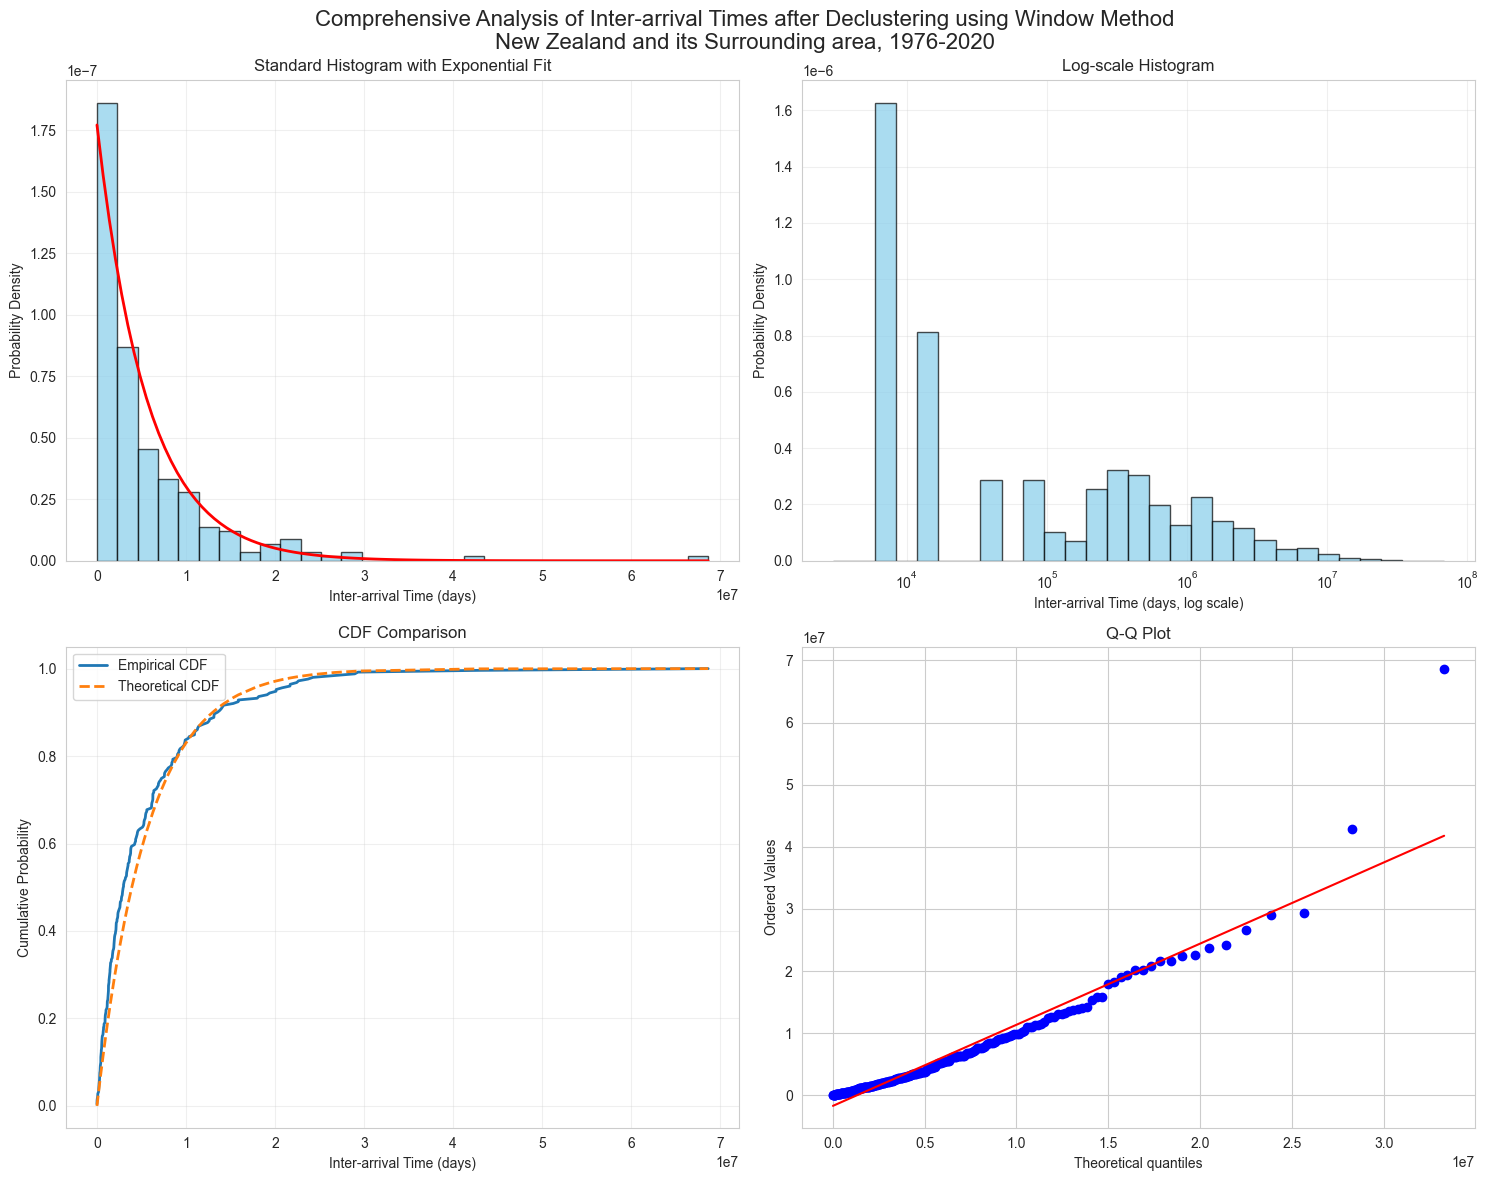

In [20]:
# Visualisation: The inter_arrival times are expected to fit an exponential distribution
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import expon
from scipy.stats import probplot

x = mainshocks_only['inter_arrival'].dropna()
loc, scale = expon.fit(x)

# Comprehensive analysis for the raw catalogue
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Standard Histogram with Exponential Fit (Top-Left)
axes[0, 0].hist(x, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
x_range = np.linspace(x.min(), x.max(), 100)
axes[0, 0].plot(x_range, expon.pdf(x_range, loc, scale), 'r-', lw=2)
axes[0, 0].set_title('Standard Histogram with Exponential Fit')
axes[0, 0].set_xlabel('Inter-arrival Time (days)')
axes[0, 0].set_ylabel('Probability Density')
axes[0, 0].grid(True, alpha=0.3)

# Log-scale Histogram (Top-Right)
bins = np.logspace(np.log10(x.min()), np.log10(x.max()), 30)
axes[0, 1].hist(x, bins=bins, density=True, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 1].set_xscale('log')
axes[0, 1].set_title('Log-scale Histogram')
axes[0, 1].set_xlabel('Inter-arrival Time (days, log scale)')
axes[0, 1].set_ylabel('Probability Density')
axes[0, 1].grid(True, alpha=0.3)

# CDF Comparison (Bottom-Left)
x_sorted = np.sort(x)
y_ecdf = np.arange(1, len(x_sorted)+1) / len(x_sorted)
y_theoretical = expon.cdf(x_sorted, loc, scale)
axes[1, 0].plot(x_sorted, y_ecdf, label='Empirical CDF', linewidth=2)
axes[1, 0].plot(x_sorted, y_theoretical, label='Theoretical CDF', linestyle='--', linewidth=2)
axes[1, 0].set_title('CDF Comparison')
axes[1, 0].set_xlabel('Inter-arrival Time (days)')
axes[1, 0].set_ylabel('Cumulative Probability')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Q-Q Plot (Bottom-Right)
probplot(x, dist=expon, sparams=(loc, scale), plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot')

plt.savefig('comprehensive_analysis_new_zealand_window.png', dpi=300, bbox_inches='tight')
plt.suptitle('Comprehensive Analysis of Inter-arrival Times after Declustering using Window Method\nNew Zealand and its Surrounding area, 1976-2020', fontsize=16)
plt.tight_layout()
plt.show()

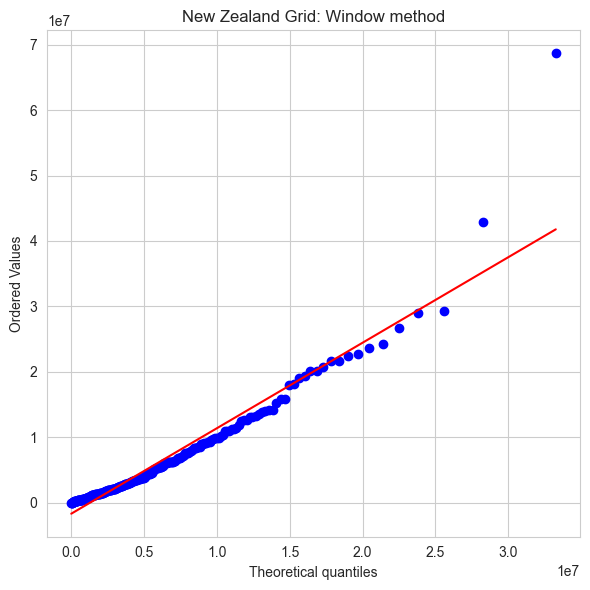

In [18]:
import matplotlib.pyplot as plt
from scipy.stats import expon
from scipy.stats import probplot

x = mainshocks_only['inter_arrival'].dropna()
loc, scale = expon.fit(x)

plt.figure(figsize=(6, 6))
probplot(x, dist=expon, sparams=(loc, scale), plot=plt)
plt.title("New Zealand Grid: Window method")
plt.tight_layout()
plt.savefig("qq_new_zealand_window.png", dpi=300)
plt.show()

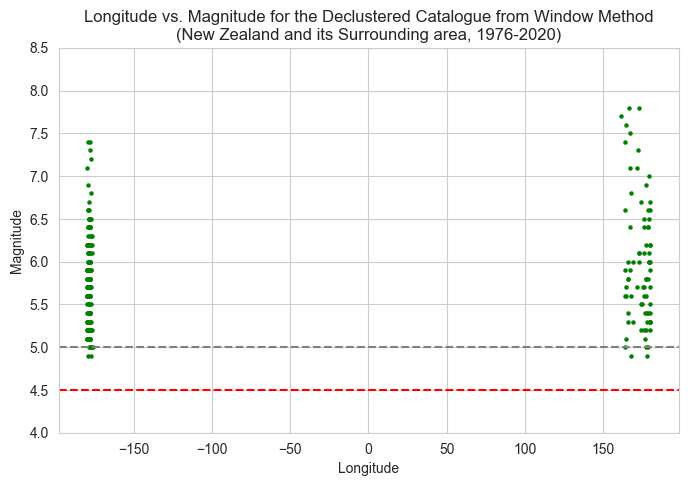

In [15]:
# Lon vs Mag
import matplotlib.pyplot as plt

x = mainshocks_only['Lon']
y = mainshocks_only['Mag']

plt.figure(figsize=(8, 5))
plt.ylim(4, 8.5)
plt.scatter(x, y, s=5, color='green')
plt.axhline(y=4.5, color='red', linestyle='--')  # Observing the minor magnitude(<4.5) events for comparison
plt.axhline(y=5, color='grey', linestyle='--')  # Observing the minor magnitude events(<5) for comparison
plt.xlabel("Longitude")
plt.ylabel("Magnitude")
plt.title("Longitude vs. Magnitude for the Declustered Catalogue from Window Method\n(New Zealand and its Surrounding area, 1976-2020)")
plt.show()

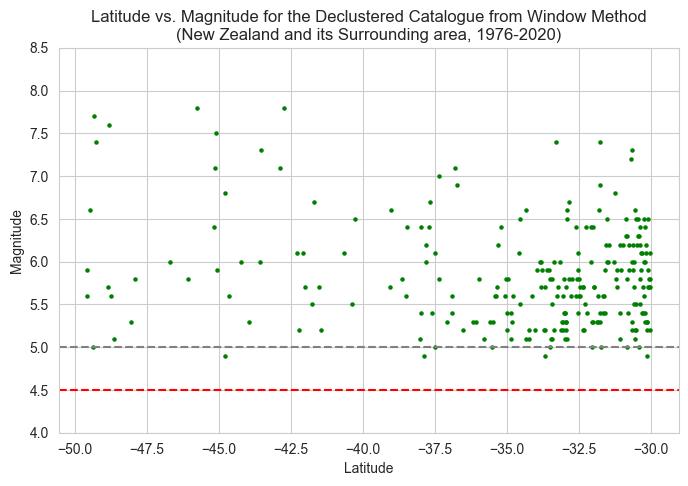

In [19]:
# Lat vs Mag
import matplotlib.pyplot as plt

x = mainshocks_only['Lat']
y = mainshocks_only['Mag']

plt.figure(figsize=(8, 5))
plt.ylim(4, 8.5)
plt.scatter(x, y, s=5, color='green')
plt.axhline(y=4.5, color='red', linestyle='--')  # Observing the minor magnitude(<4.5) events for comparison
plt.axhline(y=5, color='grey', linestyle='--')  # Observing the minor magnitude events(<5) for comparison
plt.xlabel("Latitude")
plt.ylabel("Magnitude")
plt.title("Latitude vs. Magnitude for the Declustered Catalogue from Window Method\n(New Zealand and its Surrounding area, 1976-2020)")
plt.savefig('lat_mag_win.png', dpi=300)
plt.show()

In [17]:
# KS test
from scipy.stats import kstest, expon

x = mainshocks_only['inter_arrival'].dropna()
loc, scale = expon.fit(x)
stat, p_value = kstest(x, 'expon', args=(loc, scale))

# If p_value > 0.05, the inter-arrival times are consistent with an exponential distribution.
# This implies that the earthquake occurrences follow a Poisson process.
print(f"K-S test p-value: {p_value:.4f}")
print(f"K-S Test Statistic (D): {stat:.4f}")

METHOD_NAME = "Window Method"
if p_value > 0.05:
    # We fail to reject the null hypothesis.
    print(f"The declustered catalogue from the {METHOD_NAME} method is consistent with a Poisson process.")
else:
    # We reject the null hypothesis.
    print(f"The declustered catalogue from the {METHOD_NAME} method is not consistent with a Poisson process.")

K-S test p-value: 0.0133
K-S Test Statistic (D): 0.0992
The declustered catalogue from the Window Method method is not consistent with a Poisson process.
